
### Descripcion 
Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.
Además de los datos que recuperaste en las tareas anteriores te han dado archivos para analizar respecto a los viajes que se han realizado para determinar la viabilidad de la hipotesís sugerida.

### Indice 

- [Análisis exploratorio de datos](#Análisis-exploratorio-de-datos)
- [Prueba de hipótesis (Python)](#Prueba-de-hipótesis-(Python))
- [Conclusión General](#Conclusión-General)



### Descripcion de los datos
/datasets/project_sql_result_01.csv. contiene los siguientes datos:

<li>company_name: nombre de la empresa de taxis</li>

<li>trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
</li> 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

<li>dropoff_location_name: barrios de Chicago donde finalizaron los viajes</li>

<li>average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.</li>

/datasets/project_sql_result_07.csv  contiene los siguientes datos:

<li>start_ts: fecha y hora de la recogida</li>
<li>weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje</li>
<li>duration_seconds: duración del viaje en segundos</li>

 ### Análisis exploratorio de datos

In [9]:

import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy import stats

Se cargan los datos para el análisis

In [10]:
df_result1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_result4 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_result7 = pd.read_csv('/datasets/project_sql_result_07.csv')

Se verifican los datos, por medio del conteo de los nulos y el cambio de algún tipo de dato, así mismo se enriquecen para corroborar la información respecto a ellos.

<h2>Datos / viajes por empresa</h2>

In [11]:
df_result1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
df_result1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [13]:
df_result1.isnull().sum()    

company_name    0
trips_amount    0
dtype: int64

Se exploran los datos y se observa que tanto el tipo de datos y se verifica que no existan nulos.

<h2>Datos / Destino final por viaje</h2>

In [14]:
df_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
df_result4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [16]:
df_result4.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Se exploran los datos y se observa que tanto el tipo de datos y se verifica que no existan nulos.

<h2>Datos / llegada de Loop al aeropueto de O'Hare</h2>

In [17]:
df_result7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
df_result7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [19]:
df_result7.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [20]:
df_result7['start_ts'] = pd.to_datetime(df_result7['start_ts'])
df_result7['day'] = df_result7['start_ts'].dt.strftime('%A')
df_result7['minutes'] = df_result7['duration_seconds'] / 60
df_result7

,start_ts,weather_conditions,duration_seconds,day,minutes
0,2017-11-25 16:00:00,Good,2410.0,Saturday,40.166667
1,2017-11-25 14:00:00,Good,1920.0,Saturday,32.000000
2,2017-11-25 12:00:00,Good,1543.0,Saturday,25.716667
3,2017-11-04 10:00:00,Good,2512.0,Saturday,41.866667
4,2017-11-11 07:00:00,Good,1440.0,Saturday,24.000000
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday,0.000000
1064,2017-11-11 10:00:00,Good,1318.0,Saturday,21.966667
1065,2017-11-11 13:00:00,Good,2100.0,Saturday,35.000000
1066,2017-11-11 08:00:00,Good,1380.0,Saturday,23.000000


Se exploran los datos y se encuentra que la columna start_ts es de tipo object tomando la decision de cambiar a tipo data time, asi mismo, para verificar que los datos sean del mismo dia se realiza la columna day con el nombre del dia y por ultimo la columna minutos, que transforma la duracion de los viajes de segundos a minutos.

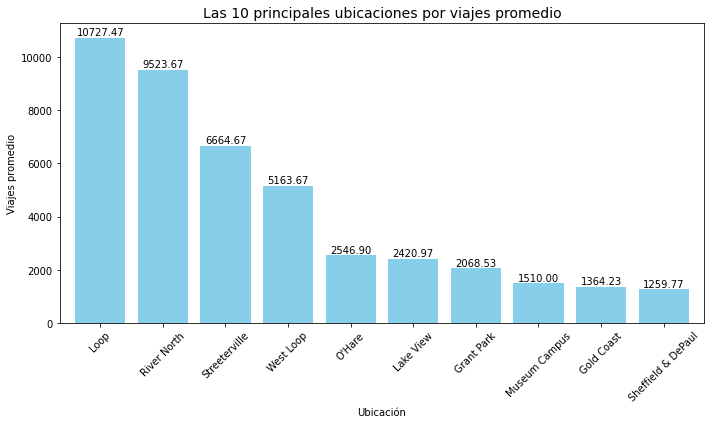

In [21]:

top_location = (
    df_result4
    .groupby('dropoff_location_name')['average_trips']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

ax = top_location.plot(kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Ubicación')
ax.set_ylabel('Viajes promedio')
ax.set_title('Las 10 principales ubicaciones por viajes promedio', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()



Se muestran los diez destinos con mayor relevancia entre los que destaca Loop y O´Hare los cuales tienen una preferencia esencial en los pasajeros que utilizan transporte, siendo esto, determinante para futuras conclusiones.

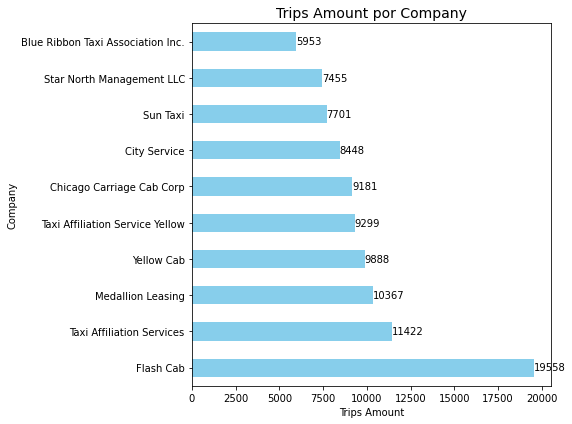

In [22]:

top_company_name = (
    df_result1
    .groupby('company_name')['trips_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Crear el gráfico de barras invertidas (horizontal bars)
ax = top_company_name.plot(kind='barh', figsize=(8, 6), color='skyblue')

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10)

# Configurar etiquetas de ejes y título
ax.set_xlabel('Trips Amount')
ax.set_ylabel('Company')
ax.set_title('Trips Amount por Company', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Entre las empresas con mayor movimiento en los destinos finales destacan  diez, las cuales podrian catalogarse como empresas lider en Chicago.

### Prueba de hipótesis (Python)

Se explora la hipotesis explorando la varianza para determinar el test a realizar posteriormente.

In [23]:


condition_bad = df_result7.query('weather_conditions == "Bad"')['minutes']
condition_good = df_result7.query('weather_conditions == "Good"')['minutes']

variance_bad = np.var(condition_bad, ddof=0)  # Varianza del conjunto "Bad"
variance_good = np.var(condition_good, ddof=0)  # Varianza del conjunto "Good"
desviacion_estandar_bad = np.sqrt(variance_bad)
desviacion_estandar_good = np.sqrt(variance_good)

statistic, p_value = stats.levene(condition_bad, condition_good)

print(f'La varianza de condition bad es {variance_bad}')
print(f'La varianza de condition good es {variance_good}')
print(f'La desviacion estandar de condition bad es {desviacion_estandar_bad}')
print(f'La desviacion estandar de condition good es {desviacion_estandar_good}')
# Imprimir el resultado
print(f"Estadístico de Levene: {statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Las varianzas son significativamente diferentes (no homogéneas).")
else:
    print("Las varianzas son similares (homogéneas).")

#Hipotesis nula H0: La duracion promedio de los viajes desde 
# el Loop hasta el aeropuerto internacional O'Hare es igual los sabados lluviosos

## Hipotesis alternativa H1:Ambas muestras tienen una distribución equitativa.

t_stat,p_value = stats.ttest_ind(condition_bad,condition_good)

if p_value < alpha:
    print('Rechazamos la hipotesis nula : No hay confianza suficiente para determinar la igualdad de las medias')
else:
    print('No rechazamos la hipotesis nula: Las medias son iguales con un intervalo de confianza de 95')

La varianza de condition bad es 143.72321202846365
La varianza de condition good es 159.92581412493575
La desviacion estandar de condition bad es 11.988461620594348
La desviacion estandar de condition good es 12.646177846485307
Estadístico de Levene: 0.3885348968365654
Valor p: 0.5332038671974493
Las varianzas son similares (homogéneas).
Rechazamos la hipotesis nula : No hay confianza suficiente para determinar la igualdad de las medias


Se realizó la prueba de Levene para evaluar la homogeneidad de las varianzas, con el propósito de determinar la prueba estadística más adecuada para el análisis posterior. El resultado de la prueba de Levene indicó que las varianzas entre los grupos no tiene una diferencia significativa misma que se corroboro calculando la varianza y la propia desviacion estandar. Por lo tanto, se optó por proceder con una prueba t estándar en lugar de la prueba t de Welch, ya que la homogeneidad de las varianzas hace que la prueba t estándar sea la opción preferida.

Además, los resultados de la prueba t mostraron un rechazo de la hipótesis nula. Esto respalda la hipótesis alternativa y demuestra que, en efecto, la duración promedio de los viajes desde el Loop hasta el aeropuerto internacional O'Hare es diferente en los sábados con condiciones climáticas adversas. En resumen, los datos respaldan la afirmación de que hay una diferencia significativa en la duración de los viajes los sábados lluviosos.

 ### Conclusión General

- [Análisis exploratorio de datos](#Análisis-exploratorio-de-datos)

Durante el análisis exploratorio se verificó que los data frames cumplieran adecuadamente con los formatos para el desarrollo del análisis , encontranto muy pocos datos nulos, la corrección de un tipo de datos a datatime y el enriquecimiento de un data frame con información que se pensó que sería útil solamente para corroborar.

Las conclusiones en cuanto al destino final por promedio de viajes,determinó que Loop es una de las localidades con mayor movimiento seguida de River North, StreetVille , West Loop y O´Hare, lo cual sugiere que de los viajes que tienen las diferentes empresas se tiende a llegar a uno de los cinco lugares mencionados anteriormente.

Dicho resultado anterior, tiene una repercusión si se toma en cuenta el gráfico de las empresas con mayor movimiento , dado a que, entre las empresas con mayor número de viajes esta Flash Cab, Taxi afiliation y Medallion Leasin, las cuales mantienen un numero promedio de viajes altamente significativo respecto al resto.

- [Prueba de hipótesis (Python)](#Prueba-de-hipótesis-(Python))

Tras verificar que el número de muestras en cuanto a los viajes con lluvia entre los que no, se propuso realizar una prueba Levene para verificr la homogeneidad de las varianzas a fin de determinar el proceso posterior, siendo este la prueba de t estandar a fin que se incorporar de mejor manera  alas condiciones.

- [Conclusión General](#Conclusión-General)

De acuerdo a los datos se puede presentar que entre los destinos con mayor relevancia para el estudio es Loop lo cual muestra viajes altamente significativos respecto al resto, así como , l empresa Flash Cab, teniendo en cuenta que los viajes en la lluvia pueden variar casí el doble del tiempo de un viaje normal, mismo que se nota en la conversión de segundos a minutos, demostrando que la hípotesis demuestra un grado de significancia adecuada.

 